# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- **Nama:** Ikhlasul Amal
- **Email:** ikhlasulamal342@gmail.com
- **ID Dicoding:** 81P2N9W7JXOY

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kategori produk apa yang memiliki jumlah penjualan terbanyak ?
- Pertanyaan 2 : Berapa rata-rata harga per kategori produk ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Loading required data from csv

In [6]:
# Bagian 2: Data Wrangling
# Load datasets
products_df = pd.read_csv('olist_products_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')

### Assessing Data

- Menampilkan 5 baris pertama dari kedua dataset

In [13]:
print(products_df.head())
print(order_items_df.head())

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

- Mengecek informasi umum dari kedua dataset

In [16]:
print(products_df.info())
print(order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   ----

- Cek nilai yang hilang

In [19]:
print(products_df.isnull().sum())
print(order_items_df.isnull().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


### Cleaning Data

In [25]:
Q1 = order_items_df['price'].quantile(0.25)
Q3 = order_items_df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

- Filter data dengan outliers

In [28]:
order_items_df_clean = order_items_df[(order_items_df['price'] >= lower_bound) & (order_items_df['price'] <= upper_bound)]

- cek ulang apakah data sudah bersih atau belum

In [31]:
print(order_items_df_clean.describe())

       order_item_id          price  freight_value
count  104223.000000  104223.000000  104223.000000
mean        1.207526      83.974668      18.558853
std         0.722539      58.580002      12.049322
min         1.000000       0.850000       0.000000
25%         1.000000      38.500000      12.790000
50%         1.000000      69.000000      16.010000
75%         1.000000     118.990000      19.840000
max        21.000000     277.300000     299.160000


## Exploratory Data Analysis (EDA)

### Explore 
- Statistik deskriptif untuk kolom harga dan jumlah (price, freight_value, product_id)
- Melihat distribusi harga produk
- Melihat hubungan antara harga produk dan biaya pengiriman (freight_value)

- Statistik deskriptif untuk kolom harga dan jumlah (price, freight_value, product_id)

In [35]:
print(order_items_df_clean.describe())

       order_item_id          price  freight_value
count  104223.000000  104223.000000  104223.000000
mean        1.207526      83.974668      18.558853
std         0.722539      58.580002      12.049322
min         1.000000       0.850000       0.000000
25%         1.000000      38.500000      12.790000
50%         1.000000      69.000000      16.010000
75%         1.000000     118.990000      19.840000
max        21.000000     277.300000     299.160000


- Melihat distribusi harga produk

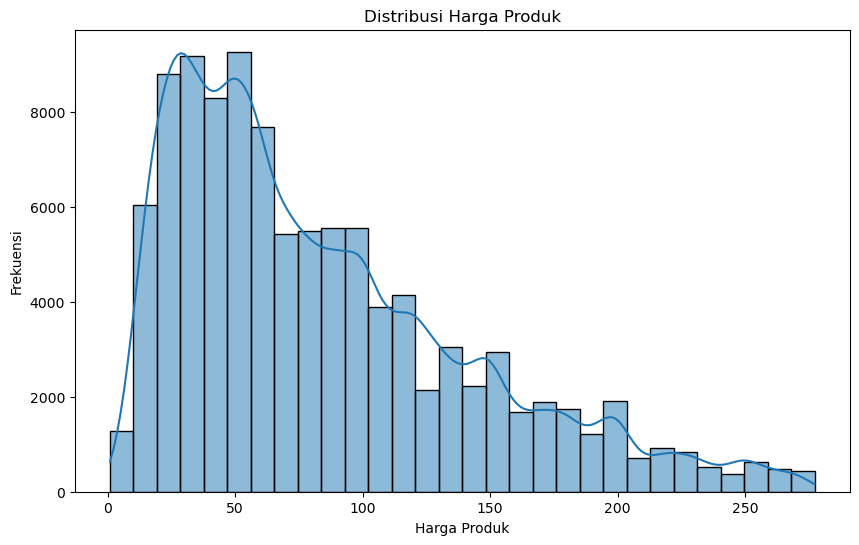

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(order_items_df_clean['price'], bins=30, kde=True)
plt.title('Distribusi Harga Produk')
plt.xlabel('Harga Produk')
plt.ylabel('Frekuensi')
plt.show()

- Melihat hubungan antara harga produk dan biaya pengiriman (freight_value)

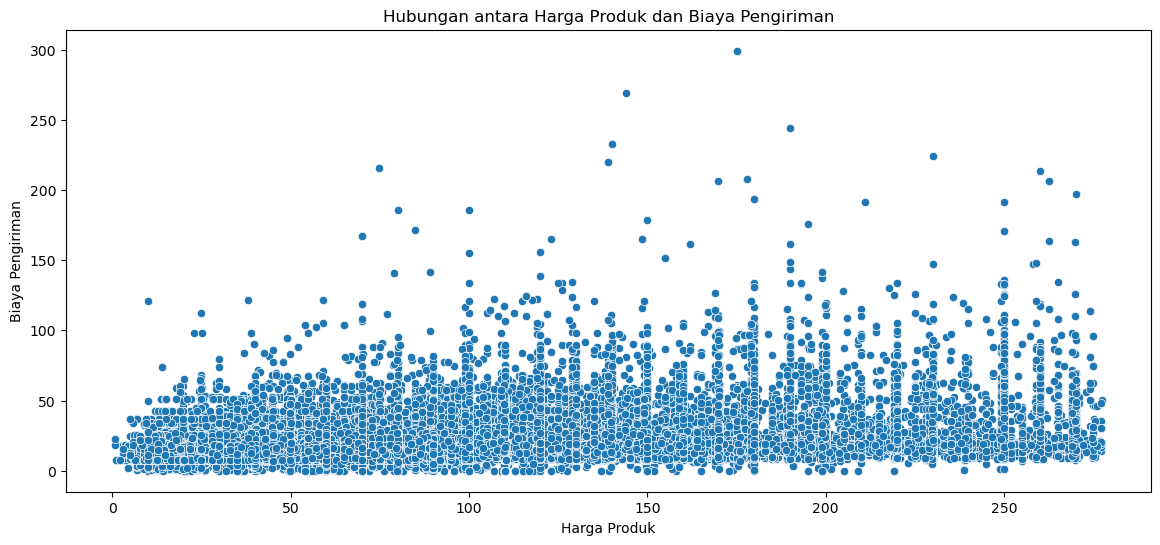

In [49]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='price', y='freight_value', data=order_items_df_clean)
plt.title('Hubungan antara Harga Produk dan Biaya Pengiriman')
plt.xlabel('Harga Produk')
plt.ylabel('Biaya Pengiriman')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Menggabungkan data order_items dengan data produk berdasarkan product_id

In [52]:
merged_df = pd.merge(order_items_df_clean, products_df, on='product_id')

- Menghitung jumlah penjualan berdasarkan kategori produk

In [86]:
sales_by_category = merged_df.groupby('product_category_name')['order_item_id'].count().reset_index().sort_values(by='order_item_id', ascending=False)

- Visualisasi hasil penjualan per kategori

C:\Users\Ikhlasul Amal\AppData\Local\Temp\ipykernel_20292\2269890252.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_item_id', y='product_category_name', data=sales_by_category, palette=colors)


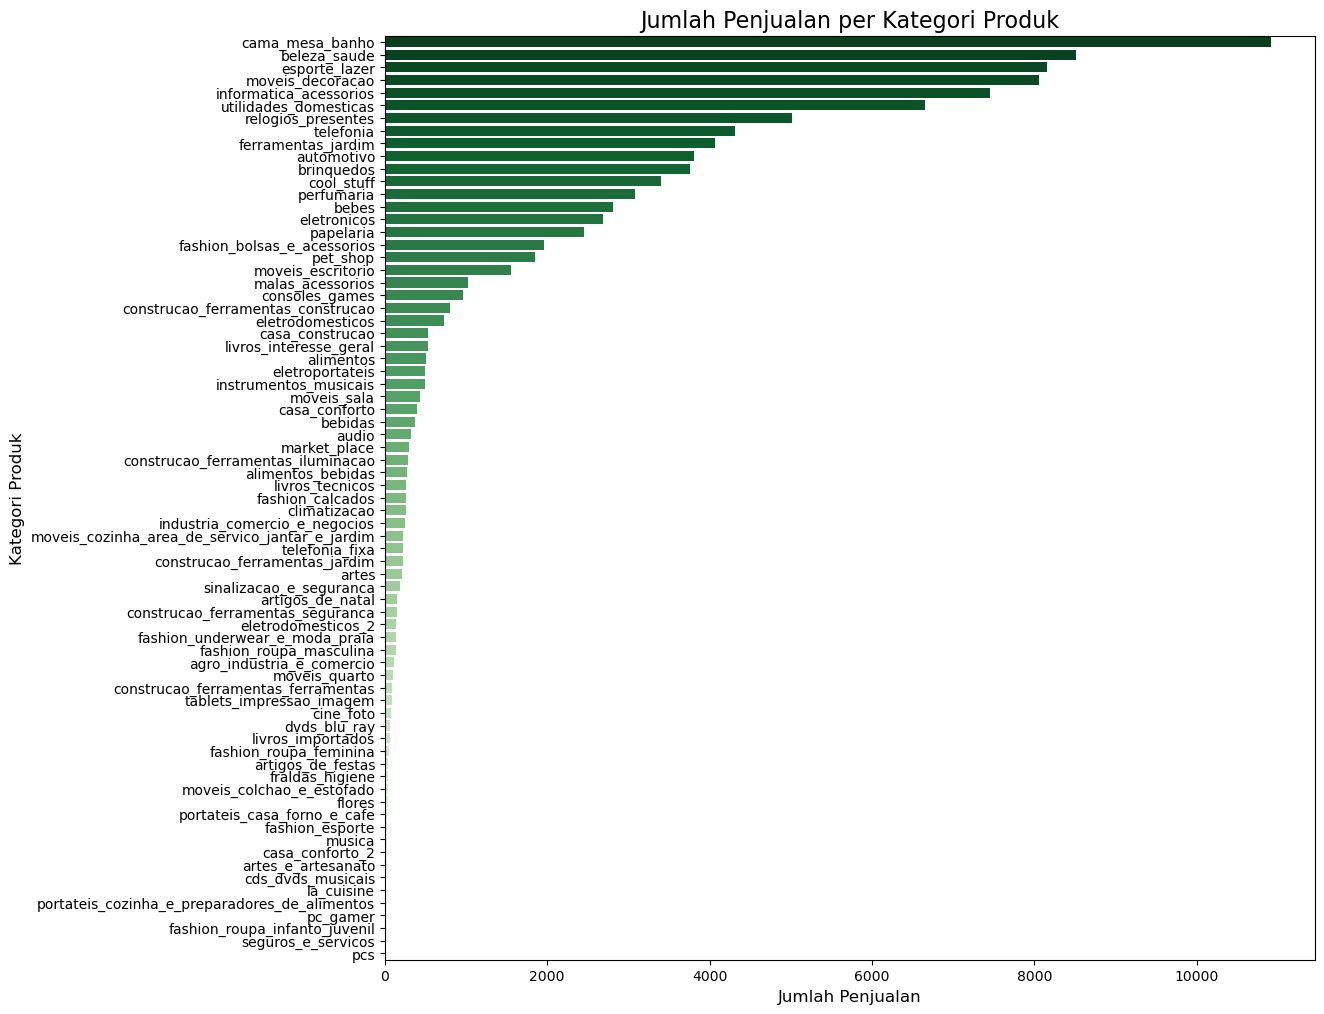

In [124]:
num_categories = len(sales_by_category)
colors = sns.color_palette("Greens", num_categories)
colors.reverse()
plt.figure(figsize=(12, 12))
sns.barplot(x='order_item_id', y='product_category_name', data=sales_by_category, palette=colors)
plt.title('Jumlah Penjualan per Kategori Produk', fontsize=16)
plt.xlabel('Jumlah Penjualan', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.show()

### Pertanyaan 2:

- Menghitung rata-rata harga produk per kategori

In [69]:
avg_price_by_category = merged_df.groupby('product_category_name')['price'].mean().reset_index().sort_values(by='price', ascending=False)

- Visualisasi rata-rata harga produk per kategori

C:\Users\Ikhlasul Amal\AppData\Local\Temp\ipykernel_20292\2376069275.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name', data=avg_price_by_category, palette=colors)


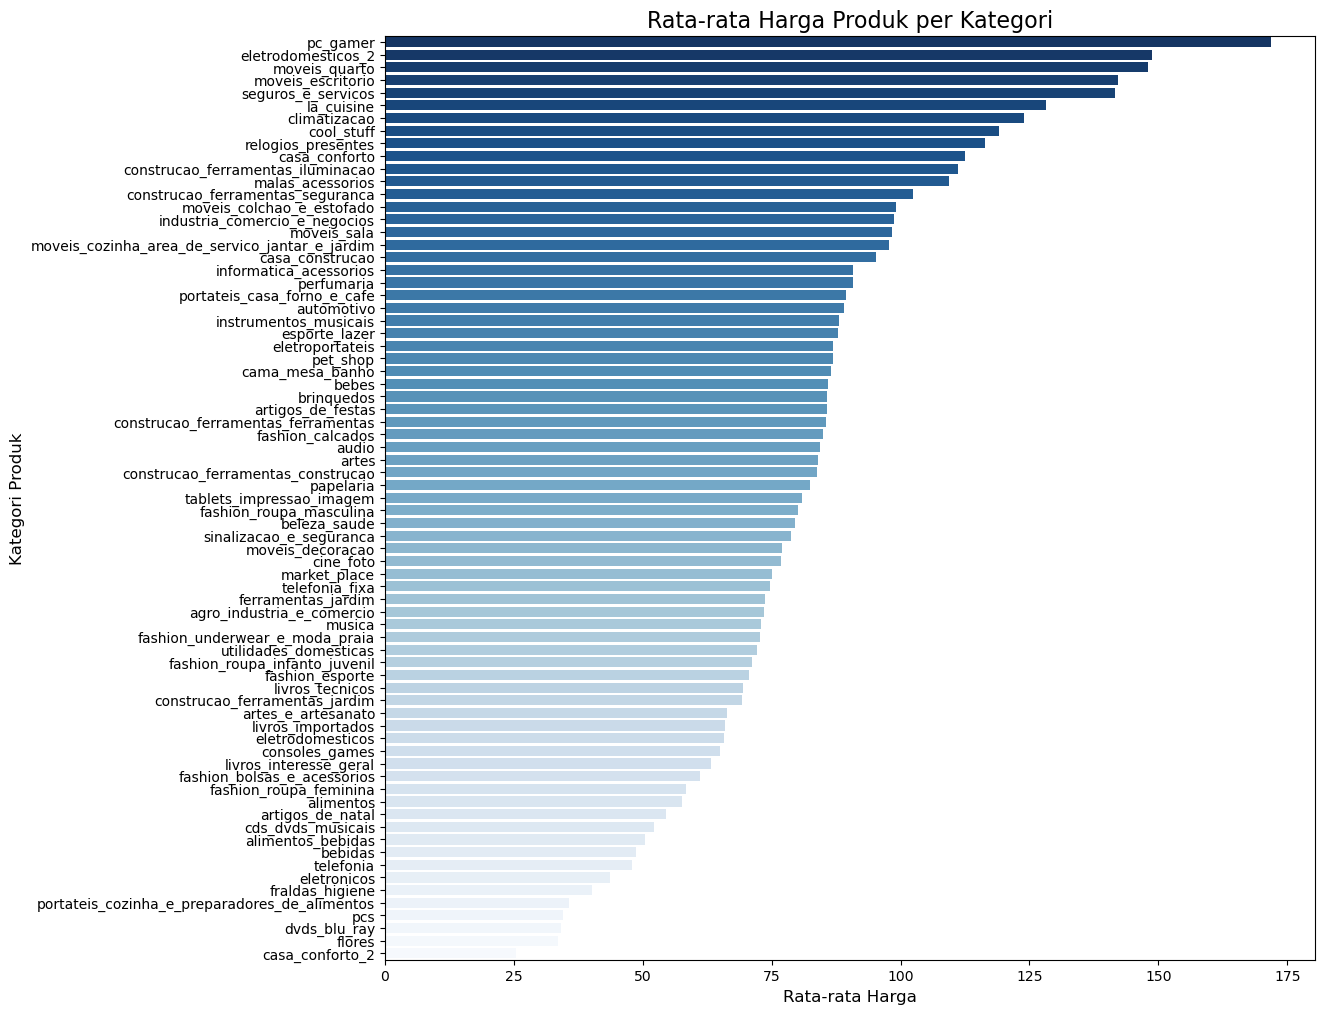

In [116]:
num_categories = len(avg_price_by_category)
colors = sns.color_palette("Blues", num_categories)
colors.reverse()
plt.figure(figsize=(12, 12))
sns.barplot(x='price', y='product_category_name', data=avg_price_by_category, palette=colors)
plt.title('Rata-rata Harga Produk per Kategori', fontsize=16)
plt.xlabel('Rata-rata Harga', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Jumlah penjualan produk yang paling sering di beli yakni dimulai dari cama_mesa_banho, beleza_saude, esporte_lazer, dan seterusnya sampai di produk yang jarang dibeli yakni seguros_e_servicos
- Conclution pertanyaan 2 : Rata-Rata Harga produk per kategori dimulai dari yang termahal yakni produk pc_gamer, eletrodomesticos_2, dan seterusnya sampai di produk yang termurah yakni casa_conforto_2